In [ ]:
+from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# change working DIR
import os
os.chdir("/content/drive/MyDrive/Project_1_Major")

In [ ]:
!dir

flight\ data.csv	      flight\ test.csv	With_Scaling.ipynb
Flight_Fare_Prediction.ipynb  Untitled0.ipynb


#Project Name: Flight Fare Prediction

##using ML

##Step 1:Install Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Step 2:loading training data

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Project_1_Major/flight data.csv")

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

###loading testing data

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/Project_1_Major/flight test.csv")

In [ ]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
df1.shape

(2671, 10)

##We will combine both the data for the purpose of Feature Engineering

In [ ]:
total_df= df.append(df1,sort= False)

<ipython-input-12-f2e28ef823ff>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df= df.append(df1,sort= False)


In [ ]:
total_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [ ]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
total_df.shape

(13354, 11)

##Step 3:EDA

###We will be doing this on our Train data only

In [ ]:
df['Airline'].value_counts() ## checking for airline data

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

###Let's see the relation b/w airline and price

<function matplotlib.pyplot.show(close=None, block=None)>

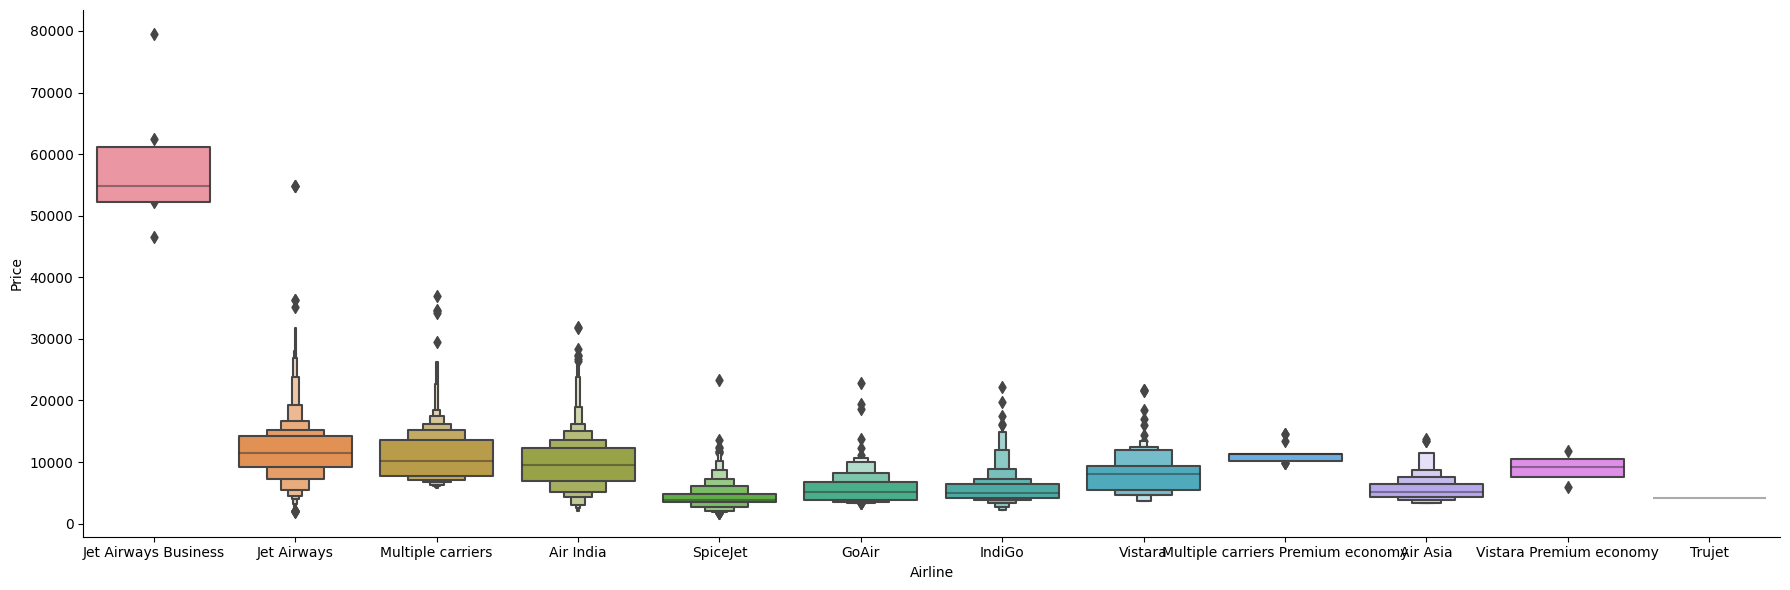

In [ ]:
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Jet airways business have the highest fare

In [ ]:
df['Source'].value_counts() ## checking for Source

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

###Finding relation b/w Source and price

<function matplotlib.pyplot.show(close=None, block=None)>

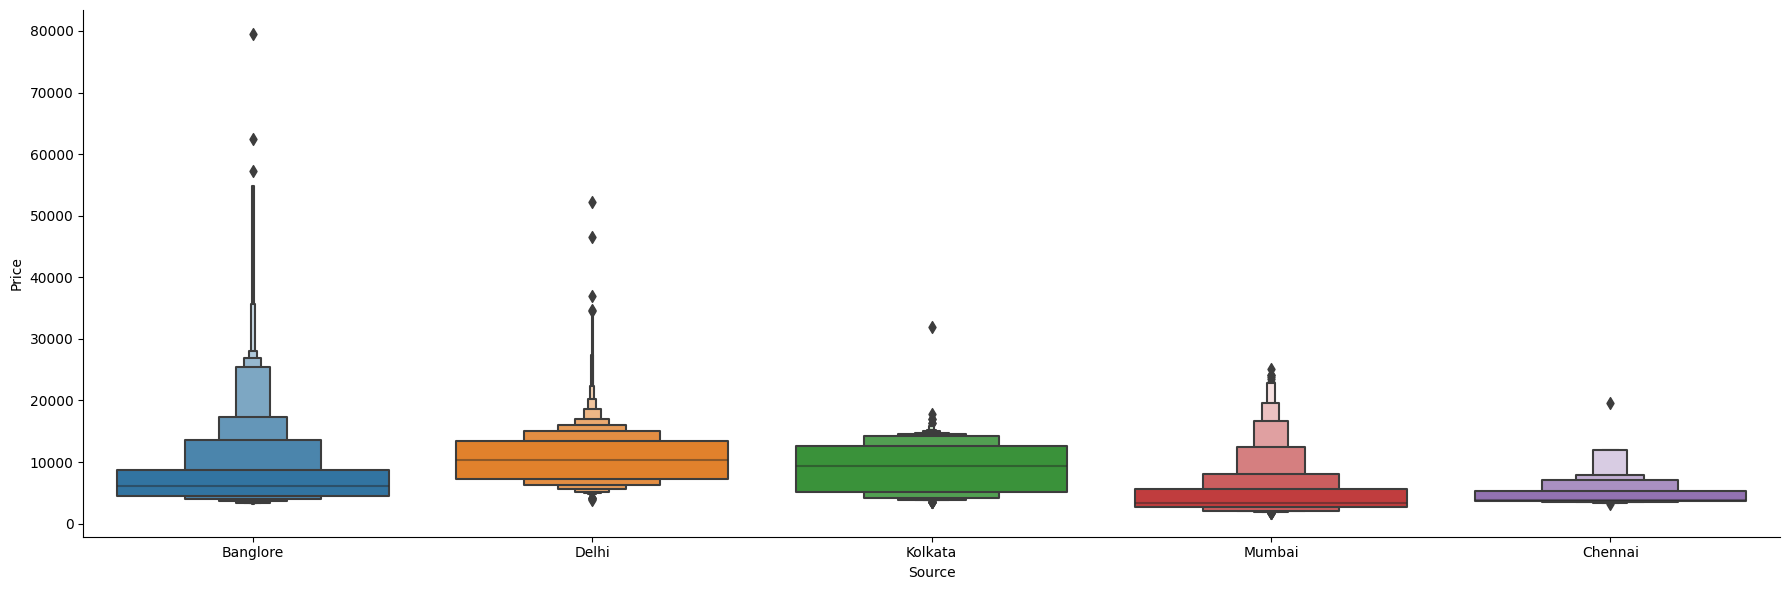

In [ ]:
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Here Banglore, Delhi and Kolkata having alomost same median price.Mumbai and Chennai having same median price

In [ ]:
df['Destination'].value_counts() ## checking for Destination

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

###Doing the same for destination

<function matplotlib.pyplot.show(close=None, block=None)>

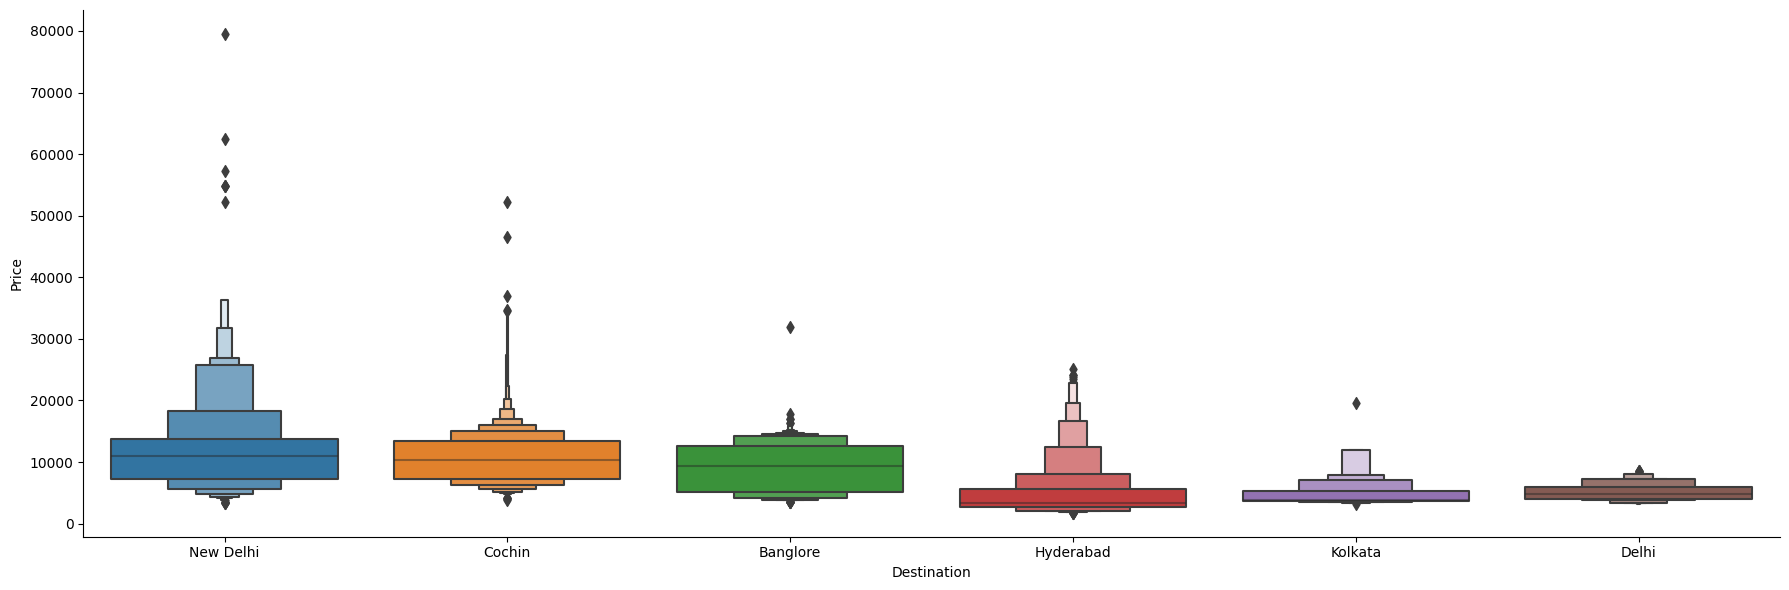

In [ ]:
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

From Destination New Delhi, Cochin and Banglore has same median price.Hyderabad,Kolkata and Delhi has same median price

##Step 4:Feature Engineering

In [ ]:
total_df['Date']=total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month']=total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year']=total_df['Date_of_Journey'].str.split('/').str[2]

In [ ]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [ ]:
total_df=total_df.drop(['Date_of_Journey'],axis=1)

In [ ]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [ ]:
total_df['Date']=total_df['Date'].astype(int)
total_df['Month']=total_df['Month'].astype(int)
total_df['Year']=total_df['Year'].astype(int)

In [ ]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

In [ ]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


###Let's see if Additional Info has any effect on price

In [ ]:
total_df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

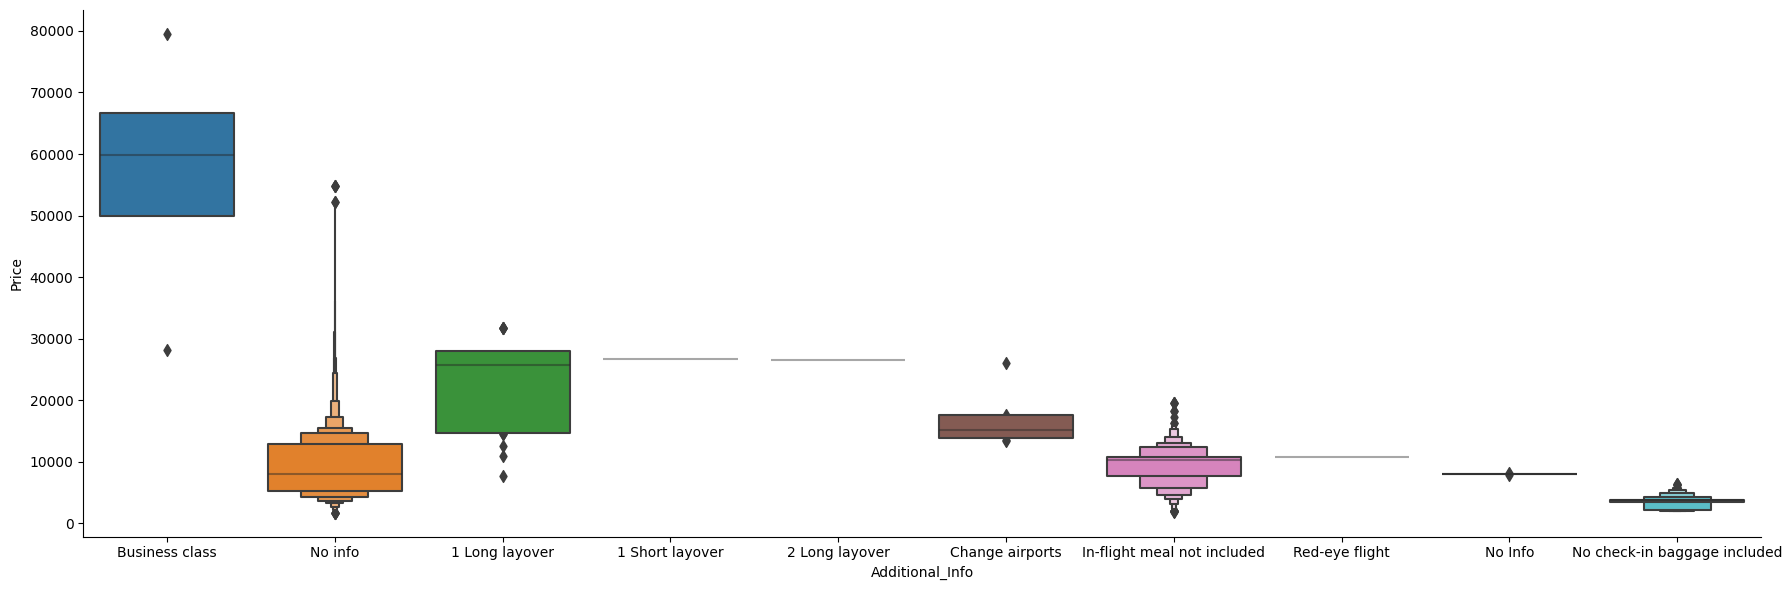

In [ ]:
sns.catplot(y='Price',x='Additional_Info',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

###Filtering the Arrival Time

In [ ]:
total_df['Arrival_Time']=total_df['Arrival_Time'].str.split(' ').str[0]

In [ ]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


###Let's analyse our Stop *coloumn*

In [ ]:
total_df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [ ]:
total_df['Total_Stops']=total_df['Total_Stops'].fillna('1 stop')

In [ ]:
total_df['Total_Stops'].isnull().sum()

0

###Let us make the Stop column numeric

In [ ]:
total_df['Total_Stops']=total_df['Total_Stops'].replace('non-stop','0 stop')

In [ ]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [ ]:
total_df['Stop'] = total_df['Total_Stops'].str.split(' ').str[0]

In [ ]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [ ]:
total_df=total_df.drop(['Total_Stops'],axis=1)

In [ ]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [ ]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stop                object
dtype: object

In [ ]:
total_df['Stop']=total_df['Stop'].astype(int)

In [ ]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stop                 int64
dtype: object

###Similarly we will try to convert all the features to numerical variables

In [ ]:
total_df['Arrival_Hour'] = total_df['Arrival_Time'] .str.split(':').str[0]
total_df['Arrival_Minute'] = total_df['Arrival_Time'] .str.split(':').str[1]

In [ ]:
total_df['Arrival_Hour']=total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute']=total_df['Arrival_Minute'].astype(int)
total_df=total_df.drop(['Arrival_Time'],axis=1)

In [ ]:
total_df['Departure_Hour'] = total_df['Dep_Time'] .str.split(':').str[0]
total_df['Departure_Minute'] = total_df['Dep_Time'] .str.split(':').str[1]

In [ ]:
total_df['Departure_Hour']=total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute']=total_df['Departure_Minute'].astype(int)
total_df=total_df.drop(['Dep_Time'],axis=1)

In [ ]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


###Let's devide the route into different columns

In [ ]:
total_df['Route_1']= total_df['Route'].str.split('→ ').str[0]
total_df['Route_2']= total_df['Route'].str.split('→ ').str[1]
total_df['Route_3']= total_df['Route'].str.split('→ ').str[2]
total_df['Route_4']= total_df['Route'].str.split('→ ').str[3]
total_df['Route_5']= total_df['Route'].str.split('→ ').str[4]

In [ ]:
total_df['Route_1'].fillna("None",inplace=True)
total_df['Route_2'].fillna("None",inplace=True)
total_df['Route_3'].fillna("None",inplace=True)
total_df['Route_4'].fillna("None",inplace=True)
total_df['Route_5'].fillna("None",inplace=True)

In [ ]:
total_df=total_df.drop(['Route'],axis=1)
total_df=total_df.drop(['Duration'],axis=1)

In [ ]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [ ]:
total_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Stop                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

###We will deal with price

In [ ]:
total_df['Price'].fillna((total_df['Price'].mean()),inplace=True)

In [ ]:
total_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

###Let us now convert all these varibales in the form our model can understand, here we will use Lable Enocoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
total_df["Airline"]=le.fit_transform(total_df['Airline'])
total_df["Source"]=le.fit_transform(total_df['Source'])
total_df["Destination"]=le.fit_transform(total_df['Destination'])
total_df["Additional_Info"]=le.fit_transform(total_df['Additional_Info'])
total_df["Route_1"]=le.fit_transform(total_df['Route_1'])
total_df["Route_2"]=le.fit_transform(total_df['Route_2'])
total_df["Route_3"]=le.fit_transform(total_df['Route_3'])
total_df["Route_4"]=le.fit_transform(total_df['Route_4'])
total_df["Route_5"]=le.fit_transform(total_df['Route_5'])

In [ ]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


Let us drop the year column because we have the dataset of the same year

In [ ]:
total_df= total_df.drop(['Year'], axis=1)

In [ ]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,1,21,35,16,50,0,34,8,12,4


##Step 5:Feature Selection

###Now it is time for us to select the features which are of the most importance

Seperate the data into independent and dependent variable

In [ ]:
X= total_df.drop(['Price'],axis=1)
y= total_df['Price']

In [ ]:
X.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,1,5,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,9,6,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,12,5,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,1,3,1,21,35,16,50,0,34,8,12,4


In [ ]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [ ]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=10))

In [ ]:
model.fit(X_train_scale,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=10))

In [ ]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
selected_features=X_train.columns[(model.get_support())]

In [ ]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

These are our selected features

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etr = ExtraTreesRegressor()
etr.fit(X_train_scale,y_train)

ExtraTreesRegressor()

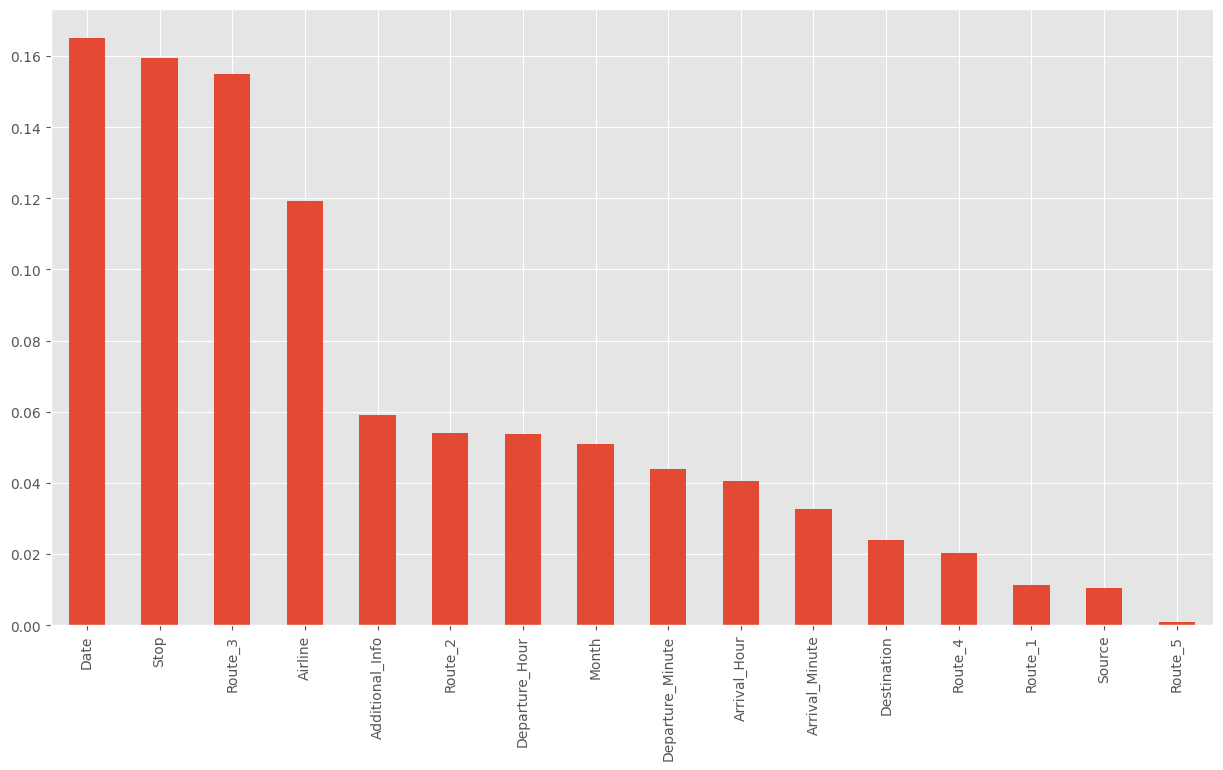

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (15,8))
feature_importances = pd.Series(etr.feature_importances_, index=X.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

###Analysising the above Graph my top 5 Date, Stop, Route_3, Arline and Additional_info

##Step 6:Importing our model

###1)RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train_scale, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test_scale)

In [ ]:
reg_rf.score(X_train_scale, y_train)

0.9455676419977457

In [ ]:
reg_rf.score(X_test_scale, y_test)

0.630410991085622

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1522.2371285080758
MSE: 6144711.535186913
RMSE: 2478.8528667887717


In [ ]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.630410991085622

In [ ]:
print(min(y))
print(max(y))

1759.0
79512.0


In [ ]:
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

Adjusted R Square:  0.6299676062057666


##Hypertuning our Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [ ]:
rf_random.fit(X_train_scale,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
reg_rf.fit(X_train_scale,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [ ]:
ypred1= reg_rf.predict(X_test_scale)

In [ ]:
ypred1

array([10279.43877249,  8987.3196713 ,  8693.35447232, ...,
        4501.57683223,  7993.49879977, 10050.76271469])

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred1))
print('MSE:', metrics.mean_squared_error(y_test, ypred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred1)))

MAE: 1556.1310729209847
MSE: 6046391.431827829
RMSE: 2458.9411200408663


In [ ]:
min(y_test)

1759.0

In [ ]:
reg_rf.score(X_test_scale, y_test)

0.6363246990520185

In [ ]:
r2 = metrics.r2_score(y_test, ypred1)

In [ ]:
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

Adjusted R Square:  0.6358884086707357


###2)KNN Regression

In [ ]:
#predicting using the KNeighbors_Regressor

from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors = 3, metric="euclidean")

#fit the model on the data and predict the values

model_KNN.fit(X_train_scale, y_train)
y_pred = model_KNN.predict(X_test_scale)

In [ ]:
y_pred

array([10367.        ,  8891.        ,  7629.02137352, ...,
        6133.66666667,  7736.33333333,  8917.        ])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2)
print(mse)

0.4946109297005056
8402495.677965716


In [ ]:
min(y_test), max(y_test)

(1759.0, 57209.0)

In [ ]:
acc_dict = dict()
for K in range(1, 31):

    # Create object with K values
    model_KNN = KNeighborsRegressor(n_neighbors=K, metric= "euclidean")

    #Model Fit
    model_KNN.fit(X_train, y_train)

    #model prediction
    y_pred = model_KNN.predict(X_test)
    r2 = r2_score(y_test,y_pred)

    #Print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(r2,K))
    acc_dict[K] =r2

Accuracy is: 0.2763239157459447 for K-Value: 1
Accuracy is: 0.4010195239947022 for K-Value: 2
Accuracy is: 0.4459494271523168 for K-Value: 3
Accuracy is: 0.46335374023442166 for K-Value: 4
Accuracy is: 0.46968658053241485 for K-Value: 5
Accuracy is: 0.4693744868453372 for K-Value: 6
Accuracy is: 0.4702188673012584 for K-Value: 7
Accuracy is: 0.46964329862581233 for K-Value: 8
Accuracy is: 0.47049896098140154 for K-Value: 9
Accuracy is: 0.46804130271691313 for K-Value: 10
Accuracy is: 0.4622307194242321 for K-Value: 11
Accuracy is: 0.4596930285238925 for K-Value: 12
Accuracy is: 0.4583657900803214 for K-Value: 13
Accuracy is: 0.4576780240281424 for K-Value: 14
Accuracy is: 0.45636234136559684 for K-Value: 15
Accuracy is: 0.45434976996251275 for K-Value: 16
Accuracy is: 0.45272626100191804 for K-Value: 17
Accuracy is: 0.44984469372659686 for K-Value: 18
Accuracy is: 0.449050832823527 for K-Value: 19
Accuracy is: 0.4481559152554324 for K-Value: 20
Accuracy is: 0.4466788797018679 for K-Val

In [ ]:
#predicting using the KNeighbors_Regressor

from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors = 9, metric="euclidean")

#fit the model on the data and predict the values

model_KNN.fit(X_train_scale, y_train)
y_pred = model_KNN.predict(X_test_scale)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2)
print(mse)

0.5718731749827919
7117949.334948002


In [ ]:
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

Adjusted R Square:  0.5713595640357816


In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 2667.948525543175


In [ ]:
model_KNN.score(X_test_scale, y_test)

0.5718731749827919

###3)SVM Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [ ]:
# Choose the kernel based on your problem characteristics
svr_model = SVR(C=0.01, kernel='linear')  # Example: Linear kernel

In [ ]:
# Train the model
svr_model.fit(X_train_scale, y_train)

SVR(C=0.01, kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = svr_model.predict(X_test_scale)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2876.581917608509
MSE: 16244324.52644319
RMSE: 4030.4248568163616


In [ ]:
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

Adjusted R Square:  0.02177242077690067


In [ ]:
min(y_test)

1759.0

####Hyper tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


In [ ]:
# Define the parameter grid for C values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an SVM regressor
svr = SVR(kernel='linear')  # You can choose the appropriate kernel for your problem

In [ ]:
# Create a GridSearchCV object
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
# # Fit the grid search to the data
grid_search.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

In [ ]:
# # Print the best parameter and corresponding score
print("Best C value: ", grid_search.best_params_['C'])
print("Best negative mean absolute error: ", grid_search.best_score_)

Best C value:  100
Best negative mean absolute error:  -2285.6037745539156


Best C value:  100
Best negative mean absolute error:  -2290.422365292933

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scale)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2263.3358313128674
MSE: 10981506.476264635
RMSE: 3313.8356139471725


In [ ]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.3394898895239984

In [ ]:
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

Adjusted R Square:  0.33869749529983884


#Comparing with all values(RMSE value) we can conclude that Random Forest(Hypertuning) gives best values for this data

**1**)Random Forest (RMSE) = 2478.852

**2**)Random Forest with Hyper Tuning (RMSE) = 2458.941

**3**)KNN (RMSE) = 2667.948

**4**)SVM (RMSE) = 4030.424

**5**)SVM Hyper Tuning (RMSE) = 3313.835